In [16]:
import numpy as np
import pandas as pd
import pickle

In [17]:
# Opening up the files
with open("../data/my_pickled_data.pkl","rb") as file:
    data_list=pickle.load(file)

In [18]:
X_train = data_list[0]
y_train = data_list[1]
X_test = data_list[2]
y_test = data_list[3]

### RFC without feat. selection

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Import the necessary libraries if you haven't already.

# 2. Create an instance of the RFC.
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed.

# 3. Fit the RFC to your training data.
rfc.fit(X_train, y_train)

# 4. Make predictions on your test data.
y_pred = rfc.predict(X_test)

# 5. Generate a classification report.
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Bad       0.63      0.58      0.61      3352
        Good       0.66      0.71      0.68      3860

    accuracy                           0.65      7212
   macro avg       0.65      0.64      0.64      7212
weighted avg       0.65      0.65      0.65      7212



## RFC with top 10 feat.

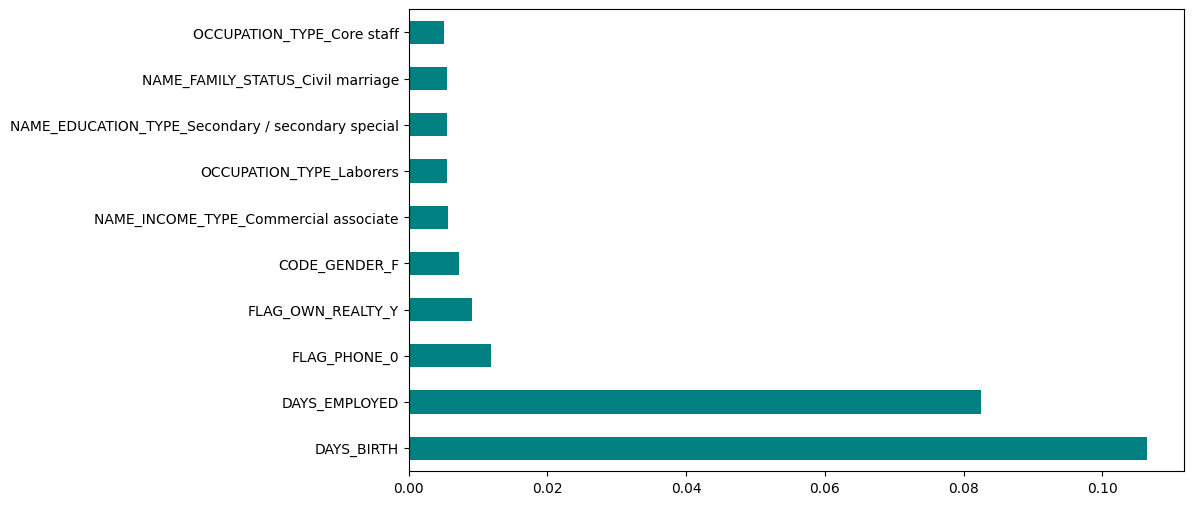

In [20]:
# top 10
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X_train, y_train)
feat_importances = pd.Series(importances, X_train.columns)

# Select the top 10 features
top_10_feats = feat_importances.nlargest(10)


plt.figure(figsize=(10, 6))
top_10_feats.plot(kind='barh', color='teal')
plt.show()

In [21]:
top_10_feature_names = top_10_feats.index
X_train_top_10 = X_train[top_10_feature_names]
X_test_top_10 = X_test[top_10_feature_names]

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Import the necessary libraries if you haven't already.

# 2. Create an instance of the RFC.
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed.

# 3. Fit the RFC to your training data.
rfc.fit(X_train_top_10, y_train)

# 4. Make predictions on your test data.
y_pred = rfc.predict(X_test_top_10)

# 5. Generate a classification report.
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Bad       0.57      0.53      0.55      3352
        Good       0.62      0.66      0.64      3860

    accuracy                           0.60      7212
   macro avg       0.60      0.59      0.59      7212
weighted avg       0.60      0.60      0.60      7212



Bonus, Using [FLAML (automl)](https://github.com/microsoft/FLAML)

In [23]:
X_train = data_list[0]
y_train = data_list[1]
X_test = data_list[2]
y_test = data_list[3]

Guys, here is how you install flaml (ensure to run all the 3 commands)  
pip install flaml  
pip install flaml[notebook]  
pip install flaml[automl]

In [24]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="classification",time_budget=60)

[flaml.automl.logger: 10-28 13:22:46] {1679} INFO - task = classification
[flaml.automl.logger: 10-28 13:22:46] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-28 13:22:47] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-28 13:22:47] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 10-28 13:22:47] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-28 13:22:47] {2344} INFO - Estimated sufficient time budget=721s. Estimated necessary time budget=17s.
[flaml.automl.logger: 10-28 13:22:47] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.4750,	best estimator lgbm's best error=0.4750
[flaml.automl.logger: 10-28 13:22:47] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-28 13:22:47] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.4742,	best estimator lgbm's best error=0.4742
[flaml.automl.logger: 10-28 13:

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 10-28 13:23:45] {2391} INFO -  at 59.0s,	estimator lrl1's best error=0.4657,	best estimator xgb_limitdepth's best error=0.2882
[flaml.automl.logger: 10-28 13:23:45] {2218} INFO - iteration 74, current learner extra_tree
[flaml.automl.logger: 10-28 13:23:45] {2391} INFO -  at 59.2s,	estimator extra_tree's best error=0.4688,	best estimator xgb_limitdepth's best error=0.2882
[flaml.automl.logger: 10-28 13:23:45] {2218} INFO - iteration 75, current learner xgboost


C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 10-28 13:23:46] {2391} INFO -  at 59.4s,	estimator xgboost's best error=0.3696,	best estimator xgb_limitdepth's best error=0.2882
[flaml.automl.logger: 10-28 13:23:46] {2218} INFO - iteration 76, current learner xgboost
[flaml.automl.logger: 10-28 13:23:46] {2391} INFO -  at 59.5s,	estimator xgboost's best error=0.3696,	best estimator xgb_limitdepth's best error=0.2882
[flaml.automl.logger: 10-28 13:23:46] {2218} INFO - iteration 77, current learner xgboost
[flaml.automl.logger: 10-28 13:23:46] {2391} INFO -  at 60.0s,	estimator xgboost's best error=0.3696,	best estimator xgb_limitdepth's best error=0.2882
[flaml.automl.logger: 10-28 13:23:47] {2627} INFO - retrain xgb_limitdepth for 1.0s
[flaml.automl.logger: 10-28 13:23:47] {2630} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.718014527550703, colsample_bynode=None,
              colsample_bytree=0.7125410881789049, device=None,
              

Apparently XGBoost is the best fit for this

In [25]:
print(automl.best_estimator)
print(automl.best_config)

xgb_limitdepth
{'n_estimators': 103, 'max_depth': 9, 'min_child_weight': 0.04929190800963801, 'learning_rate': 1.0, 'subsample': 1.0, 'colsample_bylevel': 0.718014527550703, 'colsample_bytree': 0.7125410881789049, 'reg_alpha': 0.07351743048509367, 'reg_lambda': 0.6043596822754854}
